<a href="https://colab.research.google.com/github/damianlukawski/Junior-Data-Science-Software-Engineer/blob/master/Analysing_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd

In [9]:
dftrain=  pd.read_csv(r'/content/train.csv', delimiter=';')

In [11]:
dftrain.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S
1,2,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
2,3,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S
3,4,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
4,5,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
5,6,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
6,7,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
7,8,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
8,9,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
9,10,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [16]:
dftrain.drop(['Cabin'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,S
1,2,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,S
2,3,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,S
3,4,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,S
4,5,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,S
...,...,...,...,...,...,...,...,...,...,...,...
797,798,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
798,799,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
799,800,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
800,801,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [17]:
dftrain.drop(['Ticket'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,8.0500,NaN,S
1,2,0,3,"Christmann, Mr. Emil",male,29.0,0,0,8.0500,NaN,S
2,3,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,7.8542,NaN,S
3,4,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,61.1750,E31,S
4,5,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,20.5750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
797,798,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
798,799,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
799,800,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
800,801,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


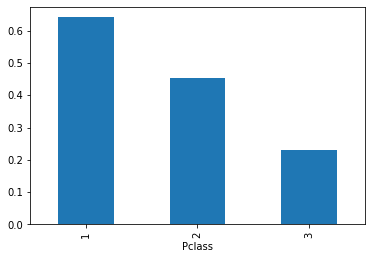

In [26]:
dftrain.groupby('Pclass').Survived.mean().plot(kind='bar')

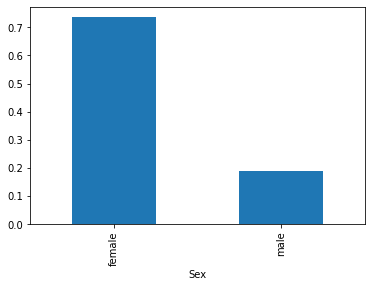

In [27]:
dftrain.groupby('Sex').Survived.mean().plot(kind='bar')

In [28]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,802.000000,802.000000,802.000000,646.000000,802.000000,802.000000,802.000000
mean,401.500000,0.377805,2.296758,30.075604,0.493766,0.374065,32.431675
std,231.661751,0.485141,0.838651,14.470148,1.084719,0.781960,50.414965
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,201.250000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,401.500000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,601.750000,1.000000,3.000000,39.000000,1.000000,0.000000,30.923950
max,802.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


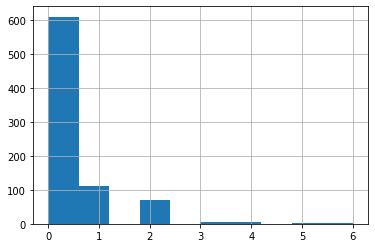

In [29]:
dftrain.Parch.hist()

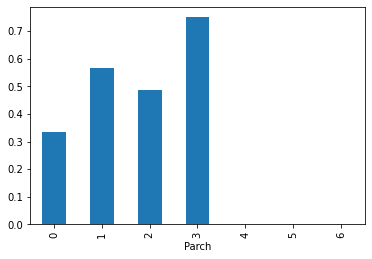

In [33]:
dftrain.groupby('Parch').Survived.mean().plot(kind='bar')

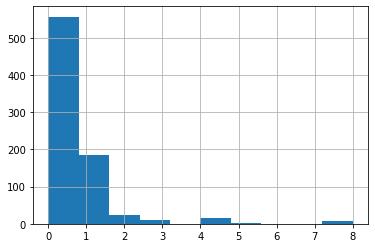

In [31]:
dftrain.SibSp.hist()

(0.0, 100.0)

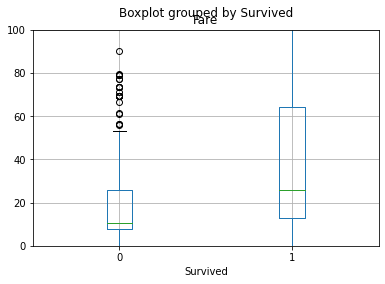

In [93]:
dftrain.boxplot(column='Fare', by='Survived')
plt.ylim((0,100))
#dftrain.Fare.plot(kind='box',by='Survived')#Survived.plot('Fare', kind='box', by='Survived')

In [92]:
import matplotlib.pyplot as plt 

# Nowa sekcja